# Find me a baller like Lebron James

The aim of this project is to determine whether traditional player stats from the NBA can be used to identify and group similar players. I will be collecting data points for every basketballer who played in the NBA for the 2015/16 season. That’s just over 470 players.

I will be testing K-means and Heirarchical clustering methods to cluster the players. I will also be using PCA to visualise the clusters of players. I will also be testing other clustering algorithms such as DBSCAN to see whether they perform better on the dataset.

My hypothesis is that the traditional player stats will be in some way useful of grouping players together.

This piece of work is inspired by Neil Charles. His analysis on soccer can be found here - http://www.hilltop-analytics.com/football/find-me-a-player-like-andres-iniesta/

The ultimate aim is build an interactive data visualisation with Bokeh that can be used by NBA scouts in order to find talent easier.

### Reading in the CSV

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import numpy as np
%matplotlib inline
a4_dims = (15, 8.4375)

In [2]:
player_stats = pd.read_csv('stats.csv')
player_stats.head()

PLAYER TEAM  AGE  GP   W   L   MIN   PTS   FGM   FGA  ...   DREB  \
0     Stephen Curry  GSW   28  79  71   8  34.2  30.1  10.2  20.2  ...    4.6   
1      James Harden  HOU   26  82  41  41  38.1  29.0   8.7  19.7  ...    5.3   
2      Kevin Durant  OKC   27  72  52  20  35.8  28.2   9.7  19.2  ...    7.6   
3  DeMarcus Cousins  SAC   25  65  29  36  34.6  26.9   9.2  20.5  ...    9.1   
4      LeBron James  CLE   31  76  56  20  35.6  25.3   9.7  18.6  ...    6.0   

    REB  AST  TOV  STL  BLK   PF  DD2  TD3   +/-  
0   5.4  6.7  3.3  2.1  0.2  2.0   15    2  12.9  
1   6.1  7.5  4.6  1.7  0.6  2.8   23    3   1.5  
2   8.2  5.0  3.5  1.0  1.2  1.9   27    1   9.0  
3  11.5  3.3  3.8  1.6  1.4  3.6   47    1   0.6  
4   7.4  6.8  3.3  1.4  0.6  1.9   28    3   8.1  

[5 rows x 28 columns]

In [3]:
stats_clean = player_stats.copy()

### Exploratory Analysis

In [4]:
pd.set_option('display.max_columns', None)
stats_clean.describe()

AGE          GP           W           L         MIN         PTS  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  476.000000   
mean    27.052521   54.785714   27.464286   27.321429   20.157773    8.349370   
std      4.407574   24.274576   16.478017   15.219228    9.223976    5.652556   
min     19.000000    1.000000    0.000000    0.000000    1.900000    0.000000   
25%     24.000000   37.000000   14.000000   15.000000   13.000000    4.000000   
50%     26.000000   62.000000   28.000000   28.000000   19.950000    7.000000   
75%     30.000000   76.000000   40.000000   38.000000   28.025000   11.625000   
max     40.000000   82.000000   73.000000   71.000000   42.400000   30.100000   

              FGM         FGA         FG%         3PM         3PA         3P%  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  476.000000   
mean     3.113235    6.951681   44.315966    0.688025    1.963655   27.020588   
std      2.053724    4.420890    8.783619    0.713570    1.862574   16.227345   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.500000    3.500000   40.400000    0.100000    0.300000   20.000000   
50%      2.700000    5.950000   43.900000    0.500000    1.500000   32.350000   
75%      4.400000    9.600000   48.200000    1.100000    3.125000   36.725000   
max     10.200000   20.500000  100.000000    5.100000   11.200000  100.000000   

              FTM         FTA         FT%        OREB        DREB         REB  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  476.000000   
mean     1.434874    1.911555   71.973319    0.870378    2.754832    3.620588   
std      1.307888    1.652358   17.903679    0.775428    1.769210    2.407671   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.575000    0.800000   66.700000    0.300000    1.500000    1.900000   
50%      1.000000    1.400000   75.400000    0.600000    2.350000    3.100000   
75%      1.900000    2.600000   82.600000    1.200000    3.600000    4.800000   
max      8.800000   10.200000  100.000000    4.900000   10.300000   14.800000   

              AST         TOV         STL         BLK          PF         DD2  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  476.000000   
mean     1.826261    1.146849    0.653361    0.415126    1.744538    4.424370   
std      1.756553    0.782957    0.438861    0.448180    0.742706    9.506151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.675000    0.600000    0.300000    0.100000    1.200000    0.000000   
50%      1.300000    0.900000    0.600000    0.300000    1.800000    0.000000   
75%      2.325000    1.500000    0.900000    0.500000    2.200000    4.000000   
max     11.700000    4.600000    2.100000    3.700000    6.000000   66.000000   

              TD3         +/-  
count  476.000000  476.000000  
mean     0.157563   -0.399790  
std      1.136183    3.077754  
min      0.000000  -10.000000  
25%      0.000000   -2.000000  
50%      0.000000   -0.500000  
75%      0.000000    1.100000  
max     18.000000   13.200000

#### Notes

* The mean age of NBA players in the 2015/16 season was 27, and the median age is 26. It would be interesting to see how age varies by team.
* We can look more into number of games played to see if there are any outliers that we can exclude from the analysis - My thinking is that there will be a group of people who have played too few games to be comparable
* We can multiply Games Played by Number of Minutes Per Game to understand the distribution of how many minutes each basketballer played for over the entire season. Another way to exclude outliers


* We can analyse the distribution and correlations of the PTS, FG, 3P, FT, REB, AST, TOV, STL & BLK to understand whether these variables need to be grouped or not. We should also look at DD2, TD3 & +/-


* We can remove W & L as they don't really give us any added information.
* We can also remove FGM, 3PM & FTM as we are more interested in the number of times they attempted, and their success rate.

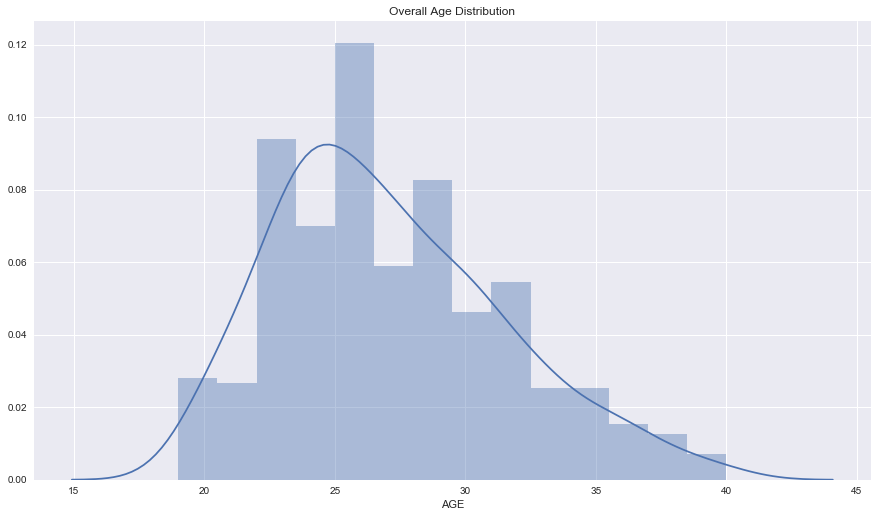

In [5]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(stats_clean['AGE'], ax=ax)
ax.set_title('Overall Age Distribution')

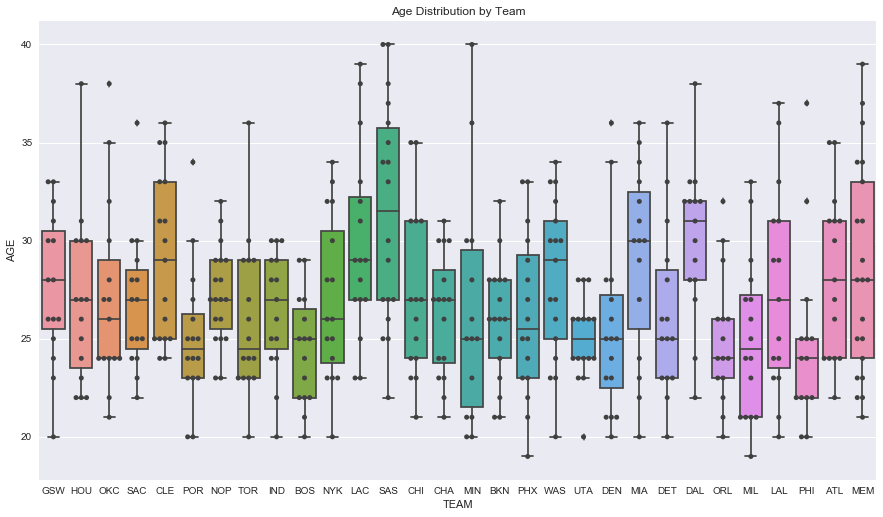

In [6]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='TEAM', y='AGE', data=stats_clean)
sns.swarmplot(ax=ax, x='TEAM', y='AGE', data=stats_clean, color=".25")
ax.set_title('Age Distribution by Team')

#### ORL and PHI have the lowest median ages, and UTA has the smallest distribution in ages, whilst MIN has the largest distibution of ages

In [7]:
team_average_age = stats_clean.groupby(['TEAM'])['AGE'].mean()
team_average_age.sort_values(ascending=True).head()

TEAM
BOS    24.466667
PHI    24.785714
UTA    25.000000
ORL    25.000000
MIL    25.062500
Name: AGE, dtype: float64

#### Although ORL and PHI have the lowest median ages, the lowest average age is in the BOS team

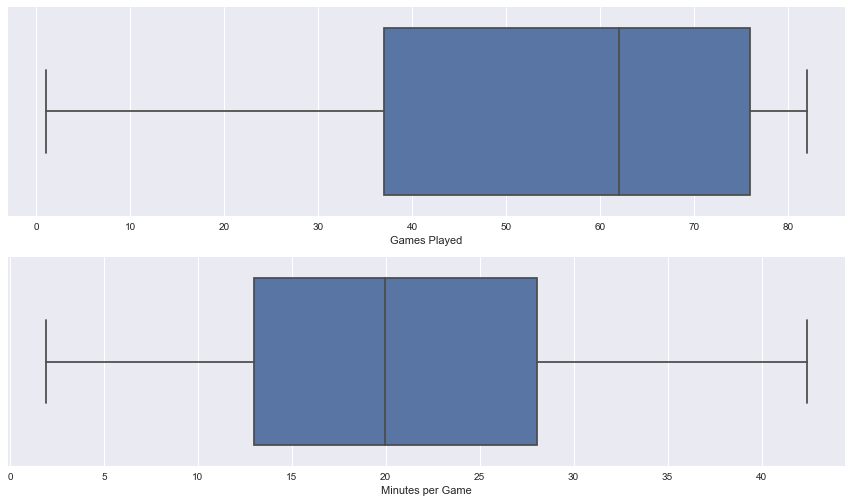

In [8]:
f, (ax1, ax2) = pyplot.subplots(2, figsize=a4_dims)
sns.boxplot(x='GP', data=stats_clean, ax=ax1)
sns.boxplot(x='MIN', data=stats_clean, ax=ax2)
ax1.set(xlabel='Games Played')
ax2.set(xlabel='Minutes per Game')

#### There doesnt seem to be any outliers in Games Played in a season or Minutes Per Game. Perhaps if we multiplied the two, we will find some outliers that can be excluded from the clustering...

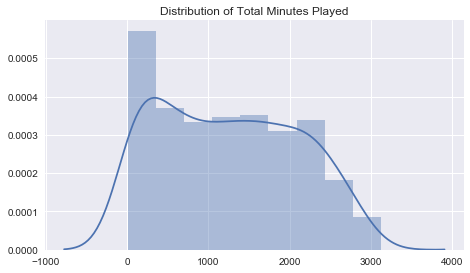

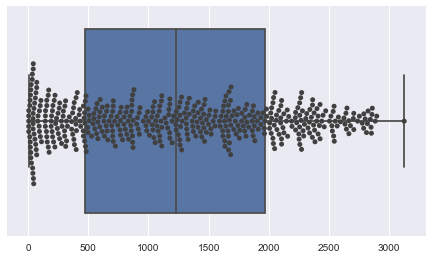

In [9]:
total_minutes_played = stats_clean['GP'] * stats_clean['MIN']

fig, ax = pyplot.subplots(figsize=(7.5, 4.21875))
sns.distplot(total_minutes_played, ax=ax)
ax.set_title('Distribution of Total Minutes Played')

fig, ax2 = pyplot.subplots(figsize=(7.5, 4.21875))
sns.boxplot(ax=ax2, x=total_minutes_played)
sns.swarmplot(ax=ax2, x=total_minutes_played, color=".25")

#### There still doesnt seem to be many outliers who have played too few minutes so, we'll be keeping them all in the clustering for now

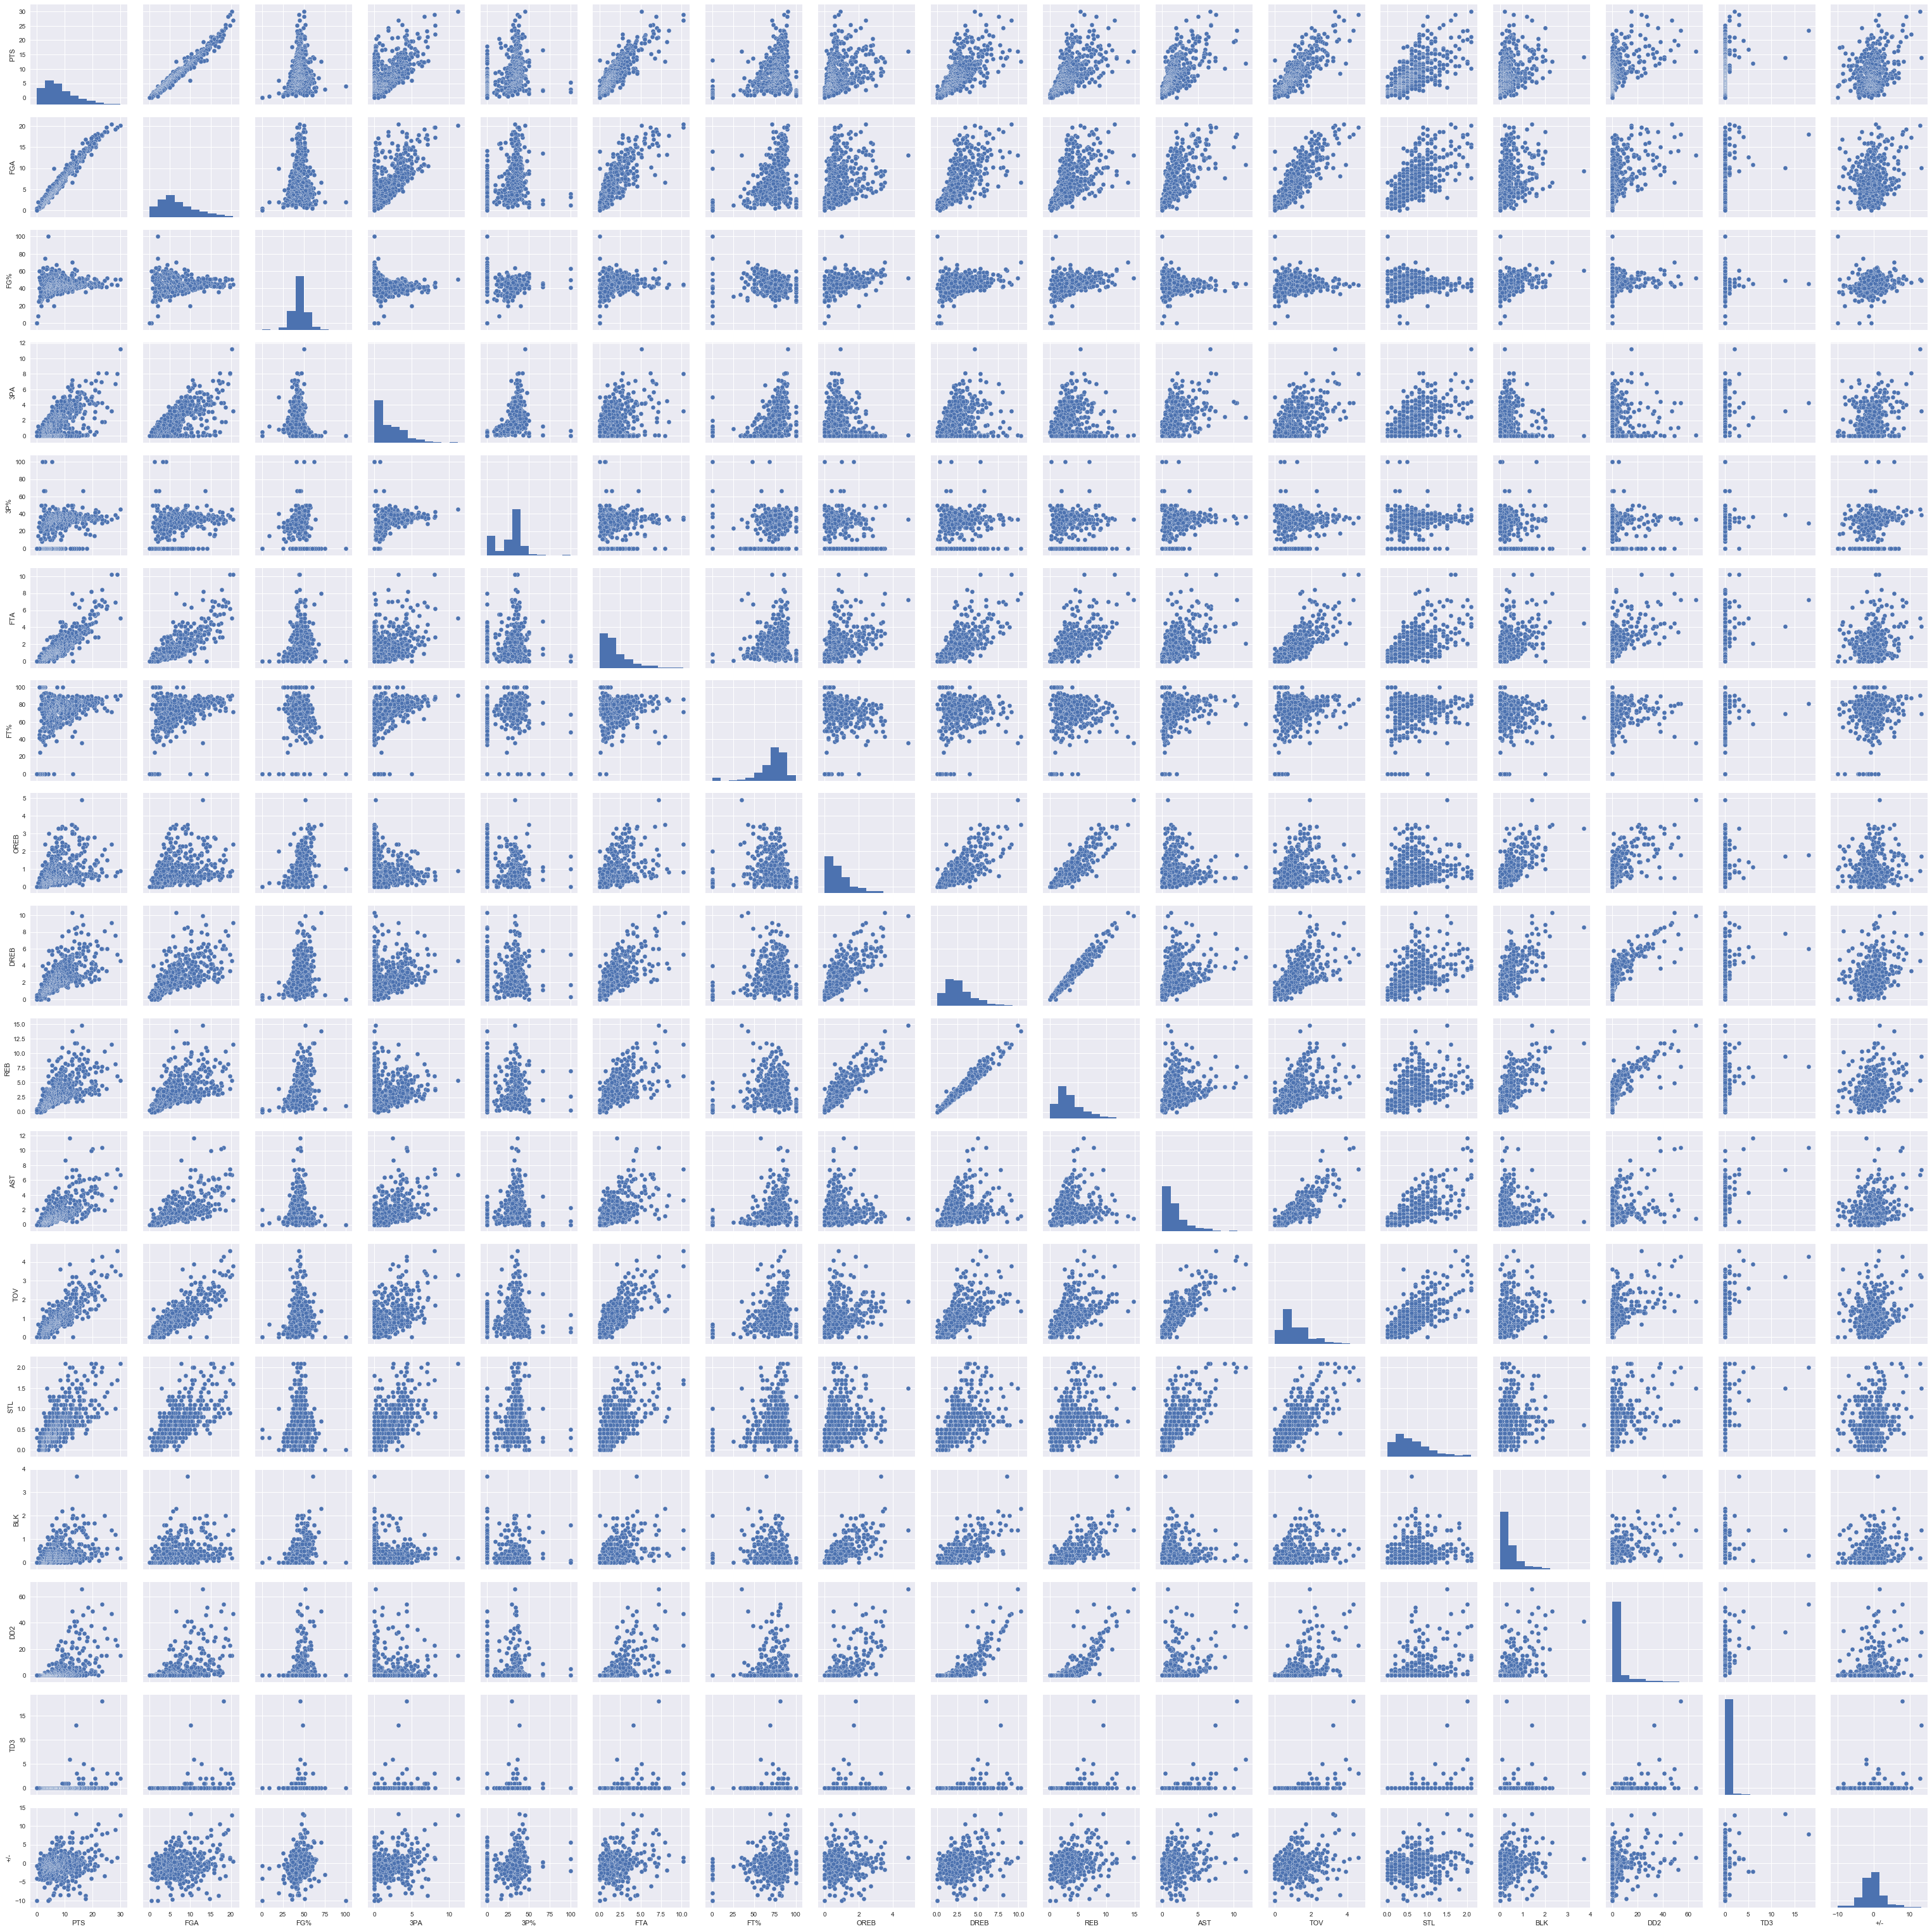

In [10]:
correl_cols = ['PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',\
               'TOV', 'STL', 'BLK', 'DD2', 'TD3', '+/-']
sns.pairplot(stats_clean[correl_cols])

#### Based on the distributions above, I will be excluding DD2 and TD3 from the modelling. I will also be excluding total Points Per Game, and Total Rebounds

#### One of the assumptions when using K-means is that it works best with spherical clusters (https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means). In order to see whether the clusters are spherical, I will use PCA to visualise my data so that I can see if the clusters are indeed spherical.

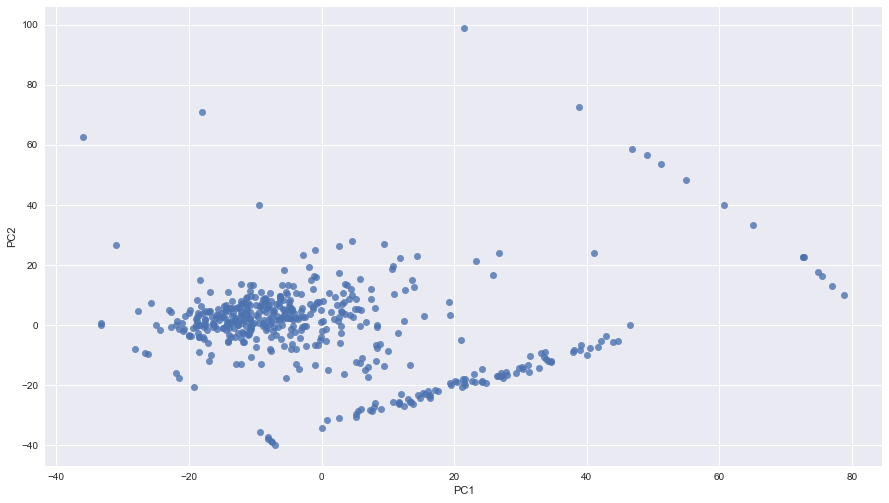

In [11]:
from sklearn import decomposition

cols_to_keep = ['FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'OREB', 'DREB', 'AST', 'TOV', 'STL', 'BLK', '+/-']
stats_clean = player_stats[cols_to_keep]

np.random.seed(5)

pca = decomposition.PCA(n_components=2)
pca.fit(stats_clean)
stats_pca = pca.transform(stats_clean)

stats_pca = pd.DataFrame(stats_pca)
stats_pca.columns = ['PC1', 'PC2']

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(x='PC1', y='PC2', data=stats_pca, fit_reg=False)

#### Hmm, doesnt seem very spherical to me, and maybe Heirarchical Clustering might be best for this data set. Although I'm not sure that PCA should be used before clustering. I will continue with K-means for now on my original dataset, and then visualise the results using PCA

### Modelling

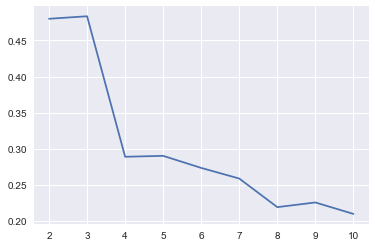

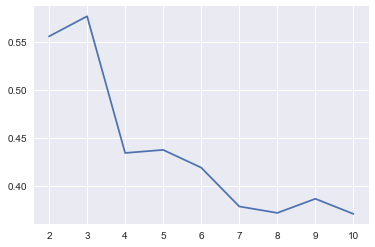

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def silhouette(df, n):
    np.random.seed(5)
    sil_coeff = []
    k_values = range(2, n)
    for n_cluster in k_values:
        kmeans = KMeans(n_clusters=n_cluster).fit(df)
        label = kmeans.labels_
        sil_coeff.append(silhouette_score(df, label, metric='euclidean'))
    pyplot.plot(k_values, sil_coeff)
    pyplot.show()

silhouette(stats_clean, 11)
silhouette(stats_pca, 11)

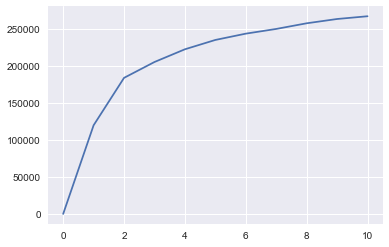

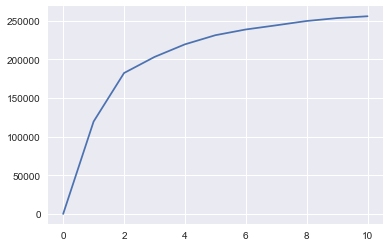

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist, pdist

def elbow(df, n):
    np.random.seed(5)
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n)]
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()

elbow(stats_clean, 12)
elbow(stats_pca, 12)

#### Contrary to my thoughts above, fitting the PCA rather than the full dataset seems to yeild better results. K-means determines that 3 clusters seems to be the most optimal. We can visualise these clusters

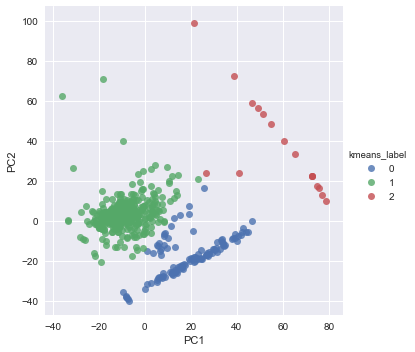

In [14]:
stats_kmeans = stats_pca.copy()
stats_kmeans = pd.concat([stats_kmeans, player_stats['PLAYER']], axis=1)

kcols = ['PC1', 'PC2']
kmeans = KMeans(n_clusters=3, random_state=0).fit(stats_kmeans[kcols])

stats_kmeans['kmeans_label'] = kmeans.labels_

sns.lmplot(x='PC1', y='PC2', data=stats_kmeans, fit_reg=False, hue='kmeans_label')

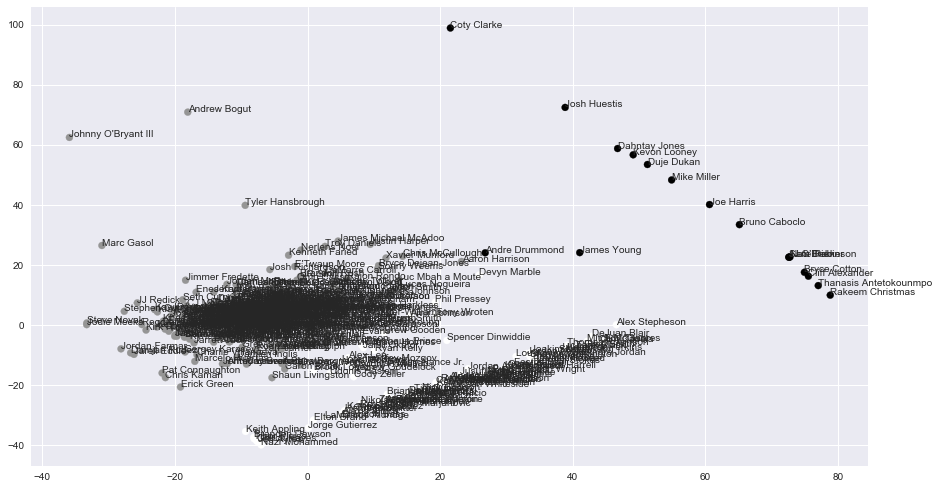

In [15]:
fig, ax = plt.subplots(figsize=a4_dims)
ax.scatter(x='PC1', y='PC2', data=stats_kmeans, c='kmeans_label')

for i, txt in enumerate(stats_kmeans.PLAYER):
    ax.annotate( txt, ( stats_kmeans.PC1[i] + .01, stats_kmeans.PC2[i] + .01 ) )

plt.show()

In [16]:
df_kmeans_summary = player_stats.copy()
df_kmeans_summary = pd.concat([df_kmeans_summary, stats_kmeans['kmeans_label']], axis=1)

df_kmeans_summary.groupby(['kmeans_label']).mean()

AGE         GP          W          L        MIN       PTS  \
kmeans_label                                                                    
0             27.354545  44.218182  21.345455  22.872727  15.682727  5.733636   
1             27.083095  60.186246  30.438395  29.747851  22.044126  9.424355   
2             24.470588  12.294118   6.000000   6.294118  10.388235  3.205882   

                   FGM       FGA        FG%       3PM       3PA        3P%  \
kmeans_label                                                                 
0             2.275455  4.507273  49.346364  0.020000  0.161818   3.004545   
1             3.462464  7.902865  43.089112  0.915759  2.584814  34.648711   
2             1.364706  3.241176  36.952941  0.335294  0.870588  25.817647   

                   FTM       FTA        FT%      OREB      DREB       REB  \
kmeans_label                                                                
0             1.160909  1.804545  65.847273  1.388182  2.969091  4.352727   
1             1.583668  2.015186  77.236676  0.718625  2.754441  3.468481   
2             0.152941  0.476471   3.558824  0.635294  1.376471  2.005882   

                   AST       TOV       STL       BLK        PF       DD2  \
kmeans_label                                                               
0             0.891818  0.894545  0.428182  0.670909  1.764545  5.572727   
1             2.186819  1.267335  0.738109  0.342120  1.767049  4.088825   
2             0.470588  0.305882  0.370588  0.258824  1.152941  3.882353   

                   TD3       +/-  
kmeans_label                      
0             0.027273 -0.709091  
1             0.206304 -0.176504  
2             0.000000 -2.982353

In [17]:
df_kmeans_summary.groupby(['kmeans_label']).median()

AGE    GP     W     L   MIN  PTS   FGM  FGA    FG%  3PM  3PA  \
kmeans_label                                                                  
0             27.0  46.5  17.0  20.0  14.2  5.1  1.95  4.2  51.55  0.0  0.0   
1             26.0  67.0  30.0  30.0  21.4  8.2  3.10  7.1  43.20  0.8  2.4   
2             23.0   5.0   2.0   2.0   6.1  1.3  0.60  1.3  40.00  0.2  0.5   

               3P%   FTM   FTA    FT%  OREB  DREB  REB  AST   TOV  STL  BLK  \
kmeans_label                                                                  
0              0.0  0.95  1.45  66.25   1.3   2.7  3.8  0.7  0.75  0.4  0.5   
1             34.4  1.10  1.50  78.20   0.5   2.3  2.9  1.7  1.10  0.7  0.2   
2             23.1  0.00  0.00   0.00   0.1   0.5  0.8  0.2  0.20  0.3  0.0   

               PF  DD2  TD3  +/-  
kmeans_label                      
0             1.8  1.0  0.0 -0.6  
1             1.8  0.0  0.0 -0.4  
2             0.6  0.0  0.0 -1.9

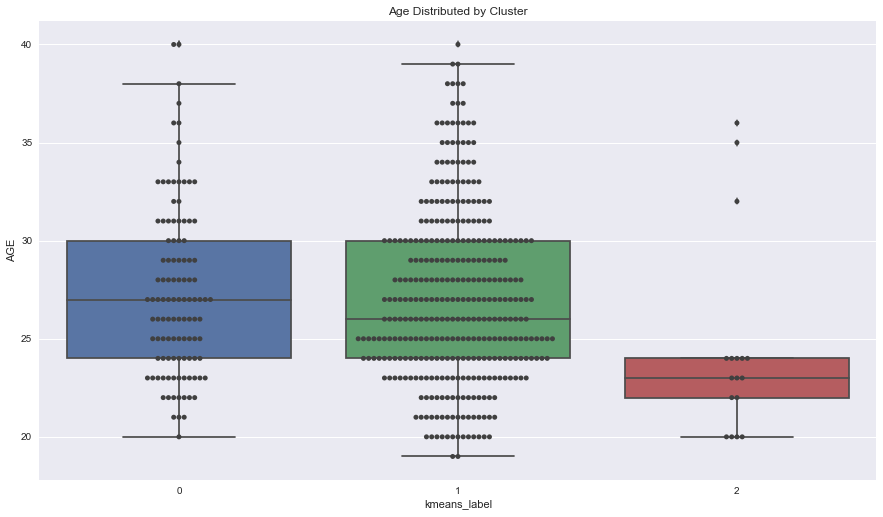

In [18]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='kmeans_label', y='AGE', data=df_kmeans_summary)
sns.swarmplot(ax=ax, x='kmeans_label', y='AGE', data=df_kmeans_summary, color=".25")
ax.set_title('Age Distributed by Cluster')

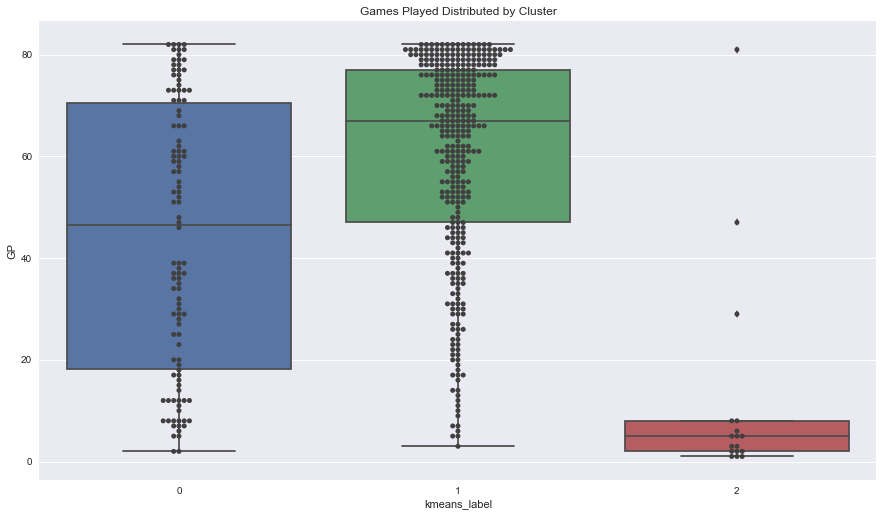

In [19]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='kmeans_label', y='GP', data=df_kmeans_summary)
sns.swarmplot(ax=ax, x='kmeans_label', y='GP', data=df_kmeans_summary, color=".25")
ax.set_title('Games Played Distributed by Cluster')

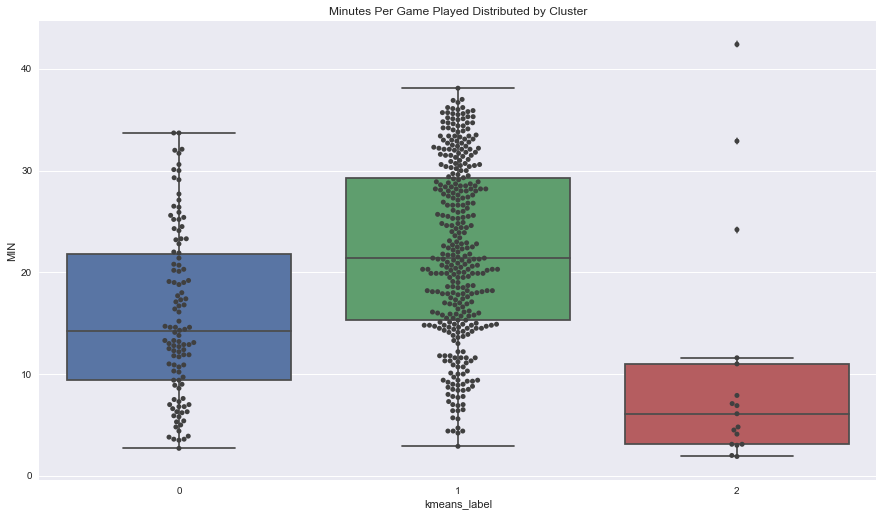

In [20]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='kmeans_label', y='MIN', data=df_kmeans_summary)
sns.swarmplot(ax=ax, x='kmeans_label', y='MIN', data=df_kmeans_summary, color=".25")
ax.set_title('Minutes Per Game Played Distributed by Cluster')

#### The cluster #2 seems to be a younger group of basketballers (with a median age of 23), who have played less games, and have played less minutes per game.

* The next step is to group each of the players stats into quintiles and run the kmeans on the new df
* Visualise the data again, and see if anything different comes up
* Try heirarchical clustering
* If neither of these provide good clusters, maybe try and cut out players who have played less than a certain number of games
* Keep going until there is a good number of varied players

### Quintiles

In [21]:
def ntile(df, n):
    df_ntile = pd.DataFrame()
    for i in range(0, len(df.columns)):
        df_ntile[df.columns[i]] = pd.qcut(df[df.columns[i]], n, labels=False)
    return df_ntile

stats_quintile = ntile(stats_clean, 5)

stats_quintile.head()

FGA  FG%  3PA  3P%  FTA  FT%  OREB  DREB  AST  TOV  STL  BLK  +/-
0    4    3    4    4    4    4     3     4    4    4    4    1    4
1    4    2    4    3    4    4     2     4    4    4    4    3    3
2    4    3    4    4    4    4     2     4    4    4    3    4    4
3    4    2    3    2    4    1     4     4    4    4    4    4    3
4    4    4    4    2    4    1     4     4    4    4    4    3    4

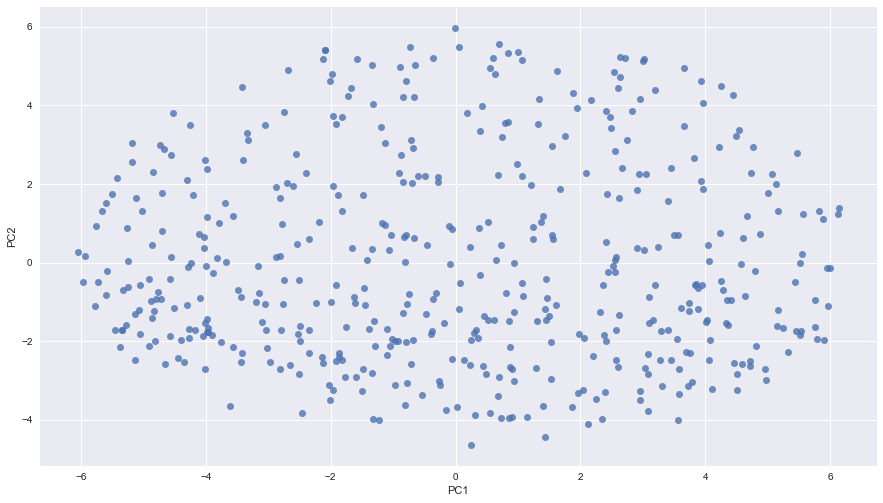

In [22]:
np.random.seed(5)

pca.fit(stats_quintile)
stats_quintile_pca = pca.transform(stats_quintile)

stats_quintile_pca = pd.DataFrame(stats_quintile_pca)
stats_quintile_pca.columns = ['PC1', 'PC2']

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(x='PC1', y='PC2', data=stats_quintile_pca, fit_reg=False)

#### Would be cool to see the old kmeans visualised on this new PCA before going on to creat a new kmeans. I can't spot any obvious clusters, but excited to see what kmeans comes up with!

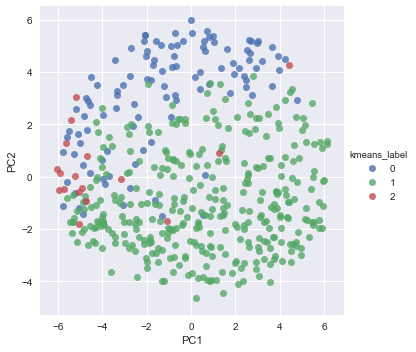

In [23]:
sns.lmplot(x='PC1', y='PC2', data=pd.concat([stats_kmeans['kmeans_label'], stats_quintile_pca], axis=1),\
           fit_reg=False, hue='kmeans_label')

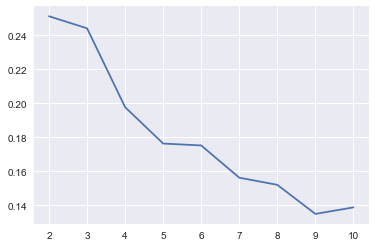

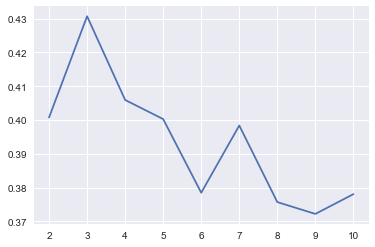

In [24]:
silhouette(stats_quintile, 11)
silhouette(stats_quintile_pca, 11)

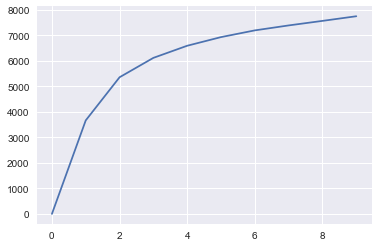

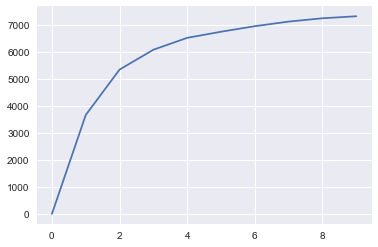

In [25]:
elbow(stats_quintile, 11)
elbow(stats_quintile_pca, 11)

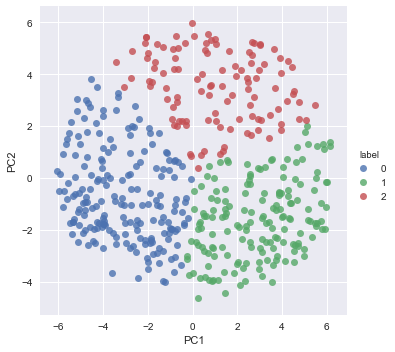

In [26]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(stats_quintile_pca)

labels = pd.DataFrame(kmeans.labels_, columns=['label'])
concat = pd.concat([stats_quintile_pca, labels['label']], axis=1)

sns.lmplot(x='PC1', y='PC2', data=concat, fit_reg=False, hue='label')

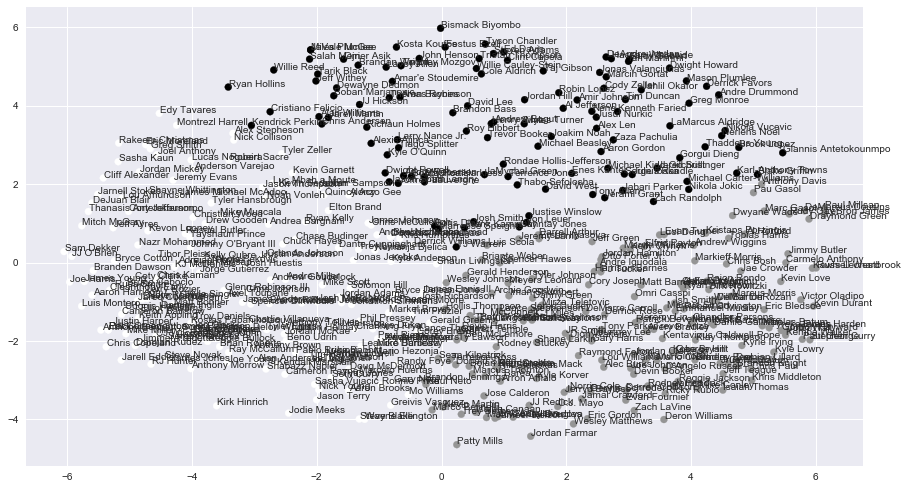

In [27]:
fig, ax = plt.subplots(figsize=a4_dims)
ax.scatter(x='PC1', y='PC2', data=pd.concat([stats_quintile_pca, labels], axis=1), c='label')

for i, txt in enumerate(stats_kmeans.PLAYER):
    ax.annotate( txt, ( stats_quintile_pca.PC1[i] + .01, stats_quintile_pca.PC2[i] + .01 ) )

plt.show()

In [28]:
pd.concat([player_stats, labels], axis=1).groupby('label').mean()

AGE         GP          W          L        MIN        PTS  \
label                                                                     
0      27.102564  39.328205  19.830769  19.497436  12.098974   3.899487   
1      27.266272  68.260355  34.656805  33.603550  28.415385  13.211834   
2      26.642857  61.366071  29.901786  31.464286  21.728571   8.759821   

            FGM        FGA        FG%       3PM       3PA        3P%  \
label                                                                  
0      1.446667   3.525128  40.982051  0.430256  1.289744  26.654872   
1      4.759763  10.939645  43.179290  1.358580  3.773964  35.304142   
2      3.530357   6.900000  51.835714  0.125000  0.405357  15.158036   

            FTM       FTA        FT%      OREB      DREB       REB       AST  \
label                                                                          
0      0.579487  0.792821  68.811282  0.405128  1.408718  1.810769  0.897436   
1      2.337870  2.906509  79.161538  0.750296  3.381065  4.125444  3.285799   
2      1.561607  2.358036  66.632143  1.861607  4.153571  6.009821  1.241071   

            TOV       STL       BLK        PF       DD2       TD3       +/-  
label                                                                        
0      0.588718  0.364615  0.176923  1.168205  0.148718  0.000000 -1.081026  
1      1.782249  1.011243  0.380473  2.081065  5.899408  0.384615  0.366864  
2      1.159821  0.616071  0.882143  2.240179  9.642857  0.089286 -0.370536

In [29]:
pd.concat([player_stats, labels], axis=1).groupby('label').median()

AGE  GP   W   L    MIN    PTS   FGM    FGA    FG%  3PM  3PA   3P%  FTM  \
label                                                                           
0       25  39  18  17  11.80   3.70  1.30   3.40  41.00  0.3  1.1  30.2  0.5   
1       27  73  35  34  28.50  12.00  4.40  10.30  43.30  1.3  3.7  35.7  1.8   
2       26  67  30  33  21.05   7.45  3.05   6.15  51.85  0.0  0.1   0.0  1.4   

        FTA   FT%  OREB  DREB  REB   AST  TOV  STL  BLK   PF  DD2  TD3   +/-  
label                                                                         
0      0.70  75.0  0.30  1.30  1.7  0.70  0.6  0.3  0.1  1.2    0    0 -0.80  
1      2.30  79.8  0.60  3.00  3.6  2.70  1.5  0.9  0.3  2.1    2    0  0.30  
2      2.05  69.1  1.65  3.65  5.4  1.05  1.1  0.6  0.8  2.1    4    0 -0.55

### Still not satisfactory, so on to Hierarchical clustering

# Brainwave... Can we not just take the euclidean distance for each of the players from the closest players around them?? .... Is that what Kmeans / Hierarchical clustering is doing....? 

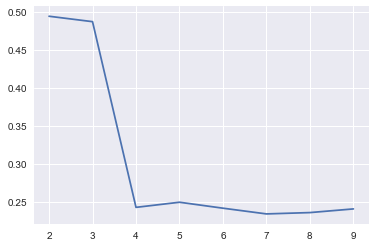

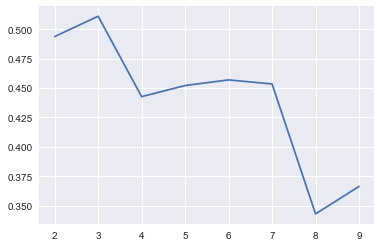

In [30]:
def agglo_silhouette(df, n):
    np.random.seed(5)
    sil_coeff = []
    k_values = range(2, n)
    for n_cluster in k_values:
        agglo = AgglomerativeClustering(n_clusters=n_cluster).fit(df)
        label = agglo.labels_
        sil_coeff.append(silhouette_score(df, label, metric='euclidean'))
    pyplot.plot(k_values, sil_coeff)
    pyplot.show()

agglo_silhouette(stats_clean, 10)
agglo_silhouette(stats_pca, 10)

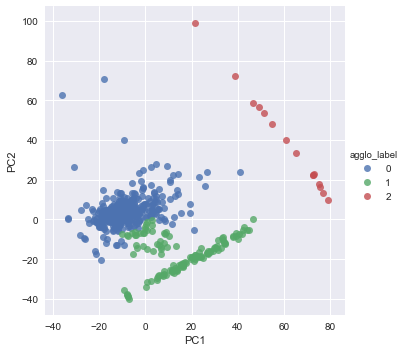

In [31]:
from sklearn.cluster import AgglomerativeClustering

stats_agglo = stats_pca.copy()
stats_agglo = pd.concat([stats_agglo, player_stats['PLAYER']], axis=1)

model = AgglomerativeClustering(n_clusters=3)
model.fit(stats_pca)

stats_agglo['agglo_label'] = model.labels_

sns.lmplot(x='PC1', y='PC2', data=stats_agglo, fit_reg=False, hue='agglo_label')

Cophenetic Distance: 0.670737855619


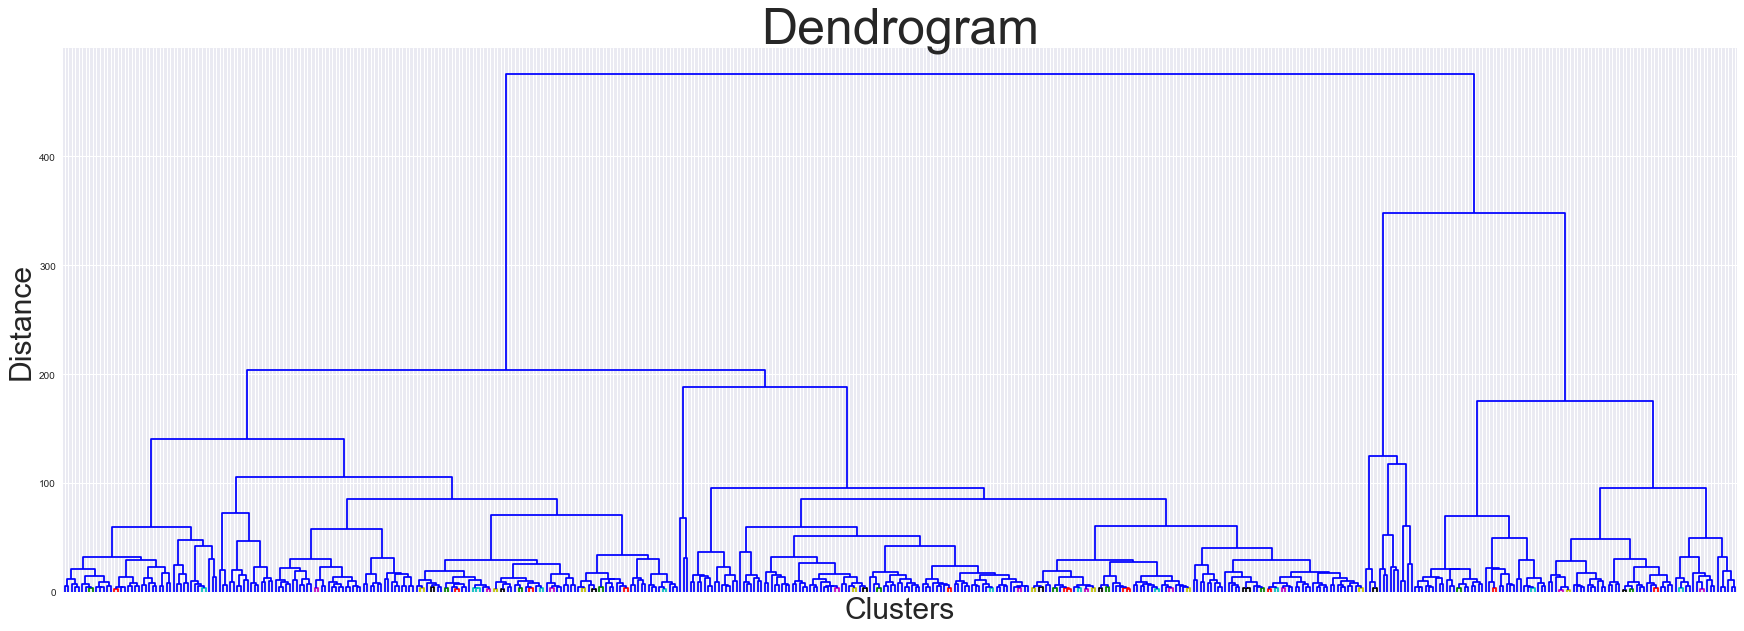

In [32]:
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram,fcluster
from scipy.spatial.distance import pdist
## Create linkages
Z = linkage(stats_clean, 'ward')
c, coph_dists = cophenet(Z, pdist(stats_clean))
print "Cophenetic Distance:",c
## Plotting of the Dendrogram 
plt.figure(figsize=(30, 10))
plt.title('Dendrogram',fontsize=50)
plt.xlabel('Clusters',fontsize=30)
plt.ylabel('Distance',fontsize=30)
dendrogram(Z,
           leaf_rotation=0.,
           leaf_font_size=18.,
           color_threshold = 4)
## Remove the X-ticks as they are fairly meaningless
plt.tick_params(
    axis='x',       
    which='both',   
    bottom='off',     
    top='off',         
    labelbottom='off')
plt.show()

In [33]:
df_agglo_summary = player_stats.copy()
df_agglo_summary = pd.concat([df_agglo_summary, stats_agglo['agglo_label']], axis=1)

df_agglo_summary.groupby(['agglo_label']).mean()

AGE         GP          W          L        MIN       PTS  \
agglo_label                                                                    
0            26.985119  59.916667  30.252976  29.663690  22.093452  9.441667   
1            27.488000  46.776000  22.888000  23.888000  16.279200  6.116800   
2            24.933333   6.600000   3.133333   3.466667   9.120000  2.486667   

                  FGM       FGA        FG%       3PM       3PA        3P%  \
agglo_label                                                                 
0            3.456250  7.903571  42.929762  0.942857  2.652679  35.101488   
1            2.436800  4.900800  48.996000  0.041600  0.236800   5.481600   
2            1.066667  2.720000  36.366667  0.366667  0.920000  25.500000   

                  FTM       FTA        FT%      OREB      DREB       REB  \
agglo_label                                                                
0            1.587798  2.043155  76.455655  0.722024  2.762500  3.479464   
1            1.196000  1.780800  68.561600  1.327200  2.963200  4.287200   
2            0.000000  0.053333   0.000000  0.386667  0.846667  1.226667   

                  AST       TOV       STL      BLK        PF       DD2  \
agglo_label                                                              
0            2.181845  1.273512  0.747321  0.33869  1.769048  4.235119   
1            1.034400  0.919200  0.442400  0.64640  1.760000  5.464000   
2            0.460000  0.206667  0.306667  0.20000  1.066667  0.000000   

                  TD3       +/-  
agglo_label                      
0            0.196429 -0.172024  
1            0.072000 -0.648800  
2            0.000000 -3.426667

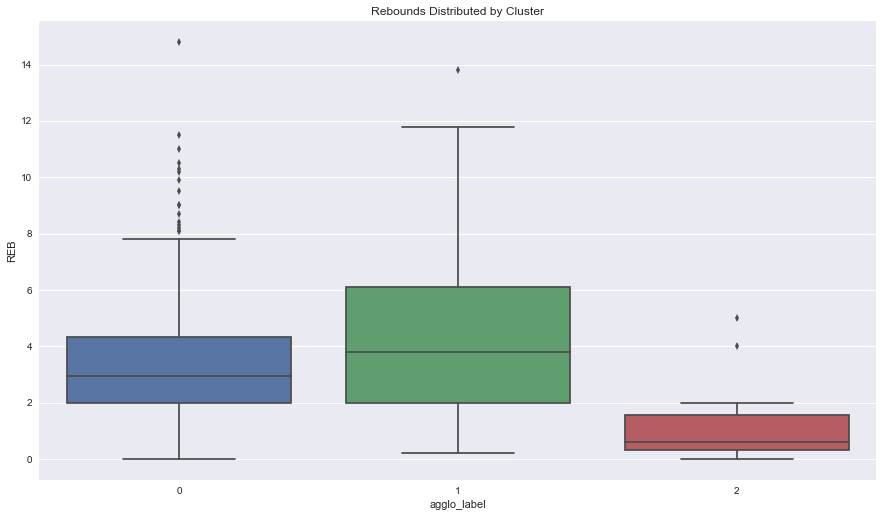

In [34]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='agglo_label', y='REB', data=df_agglo_summary)
ax.set_title('Rebounds Distributed by Cluster')

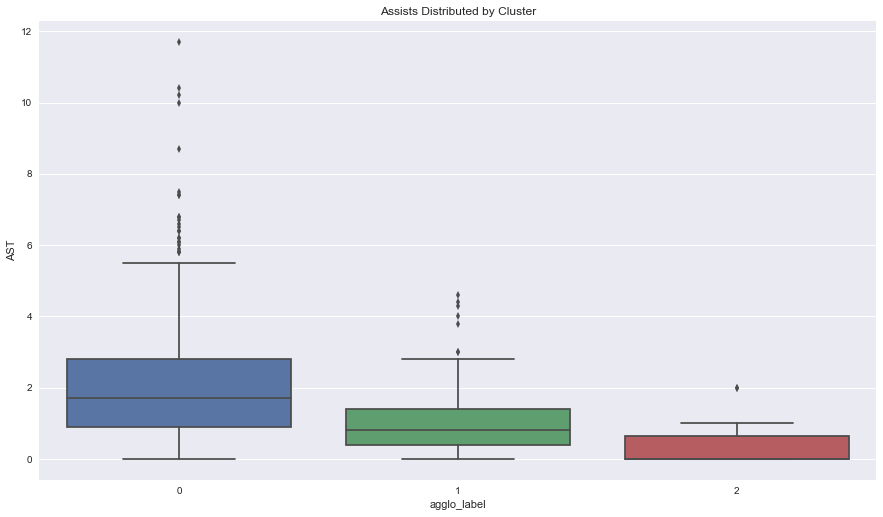

In [35]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='agglo_label', y='AST', data=df_agglo_summary)
ax.set_title('Assists Distributed by Cluster')

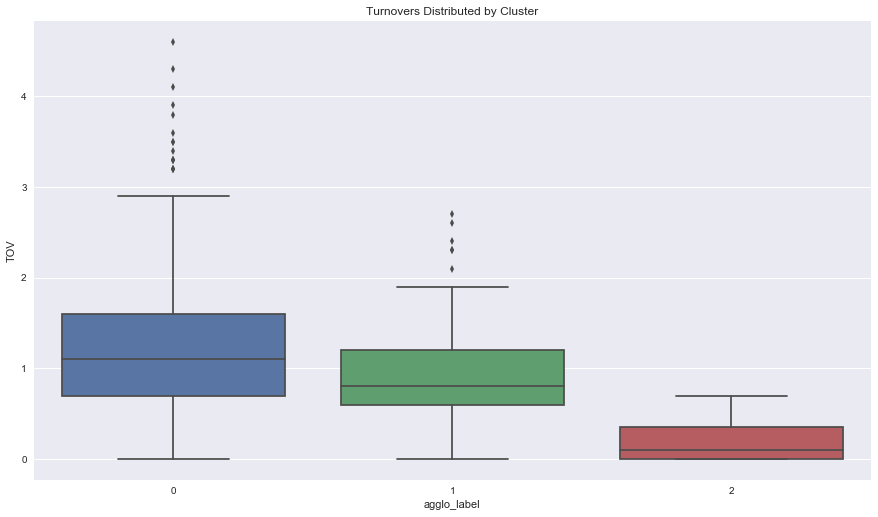

In [36]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='agglo_label', y='TOV', data=df_agglo_summary)
ax.set_title('Turnovers Distributed by Cluster')

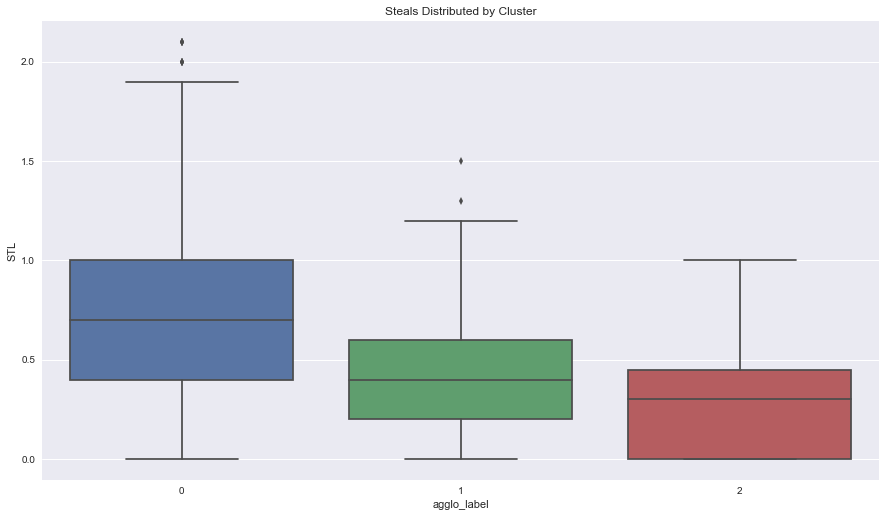

In [37]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='agglo_label', y='STL', data=df_agglo_summary)
ax.set_title('Steals Distributed by Cluster')

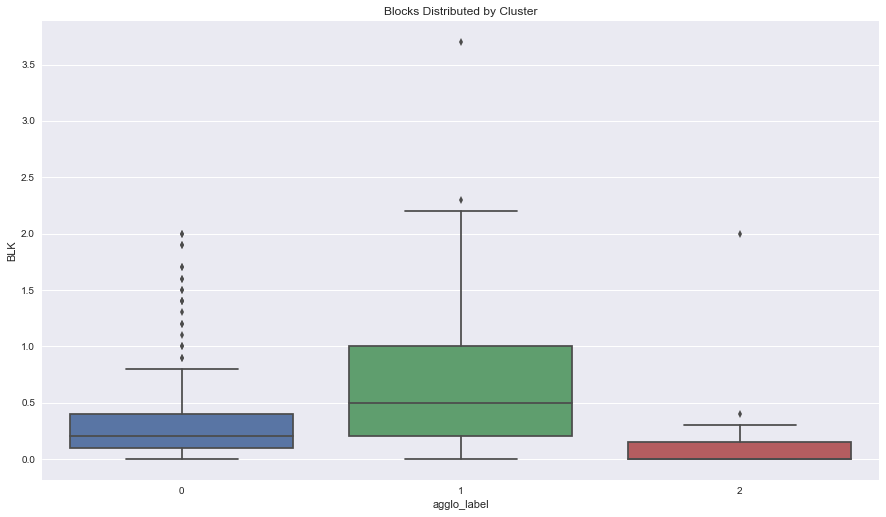

In [38]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='agglo_label', y='BLK', data=df_agglo_summary)
ax.set_title('Blocks Distributed by Cluster')

#### From what I can see here, we have one group who are strong at Rebounds and Blocks and another group who are strong at Assists, Turnovers, and Steals. The final group seem to be the group who have not had much experience or time playing basketball

# DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
db = DBSCAN(eps=0.45, min_samples=1).fit(stats_quintile_pca)

In [41]:
stats_db = stats_pca.copy()
stats_db['db_label'] = db.labels_

In [42]:
final_output = pd.concat([player_stats, stats_db], axis=1)

In [43]:
final_output.to_csv('final_output.csv')

# Visualisation

In [44]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [45]:
from bokeh.io import show
from bokeh.plotting import figure

In [46]:
final_data = pd.read_csv('final_output.csv')

In [47]:
from bokeh.models import ColumnDataSource
source = ColumnDataSource(dict(
    x=final_data.PC1,
    y=final_data.PC2,
    player=final_data.PLAYER,
    team=final_data.TEAM,
    age=final_data.AGE,
    games_played=final_data.GP,
    clusters=final_data.db_label,
    plus_minus=final_data['+/-'],
    points=final_data.PTS
    )
)

In [48]:
from bokeh.models import HoverTool

In [49]:
from bokeh.models import LinearInterpolator, LinearColorMapper, ColorBar, BoxZoomTool, ResetTool
from bokeh.palettes import Plasma256

color_mapper = LinearColorMapper(
    palette = Plasma256,
    low=final_data.PTS.min(), 
    high=final_data.PTS.max()
)

size_mapper = LinearInterpolator(
    x=[final_data.PTS.min(), final_data.PTS.max()],
    y=[2, 40]
)

In [50]:
from ipywidgets import interact
from bokeh.io import push_notebook

def update(player):
    cluster = int(final_data.loc[final_data['PLAYER'] == player].db_label)
    new_data = dict(
        x=final_data.loc[final_data['db_label'] == cluster].PC1,
        y=final_data.loc[final_data['db_label'] == cluster].PC2,
        player=final_data.loc[final_data['db_label'] == cluster].PLAYER,
        team=final_data.loc[final_data['db_label'] == cluster].TEAM,
        age=final_data.loc[final_data['db_label'] == cluster].AGE,
        games_played=final_data.loc[final_data['db_label'] == cluster].GP,
        clusters=final_data.loc[final_data['db_label'] == cluster].db_label,
        plus_minus=final_data.loc[final_data['db_label'] == cluster]['+/-'],
        points=final_data.loc[final_data['db_label'] == cluster].PTS
    )
    source.data = new_data
    p.title.text = str('Basketballers similar to %s during the 2015/16 season - Colours Represent Points per Game' % player)
    push_notebook()

In [51]:
hover = HoverTool(tooltips='@player', show_arrow=False)
p = figure(tools=[hover,BoxZoomTool(), ResetTool()],
          title='Basketballers from the 2015/16 season - Colours Represent Points per Game',
          plot_width=900,
          x_axis_label='Principle Component 1',
          y_axis_label='Principle Component 2')
p.circle(x='x', y='y',
         size={'field': 'points', 'transform': size_mapper},
         color={'field': 'points', 'transform': color_mapper},
         alpha=0.5,
         source=source
)
p.add_layout(ColorBar(color_mapper=color_mapper, location=(0, 0), orientation='horizontal'), 'below')
show(p, notebook_handle=True)

In [1]:
interact(update, player=list(final_data.PLAYER.unique()))

NameError: name 'interact' is not defined

# Use collaborative filtering (recommender system) to improve recommendations